## Prerequisites

In [953]:
#!pip install PyEnchant

Import the necessary python libraries to do the exploratory data analysis.

In [954]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
import enchant

%matplotlib inline

plt.style.use('bmh')

carroya_df = pd.read_csv('carroya_data.csv')
tucarro_df = pd.read_csv('tucarro_data.csv')

## First glance at the datasets

### CarroYa

In [955]:
carroya_df.head()

,Unnamed: 0,NOMBRE,SUBTITULO,PRECIO,PRECIO MENSUAL,KILOMETRAJE,ANIO,TIPO DE CAJA,CILINDRAJE,COMBUSTIBLE,COLOR,ESTADO,UBICACIÓN,DIRECCIÓN,PLACA,PUERTAS,AIRBAGS,IMAGEN
0,0,Mercedes Benz Clase GLA,200 Automatico,$122.900.000,$3.058.891,22.036 km,2020,Secuencial,1.6,Gasolina,Blanco,usado,Bogotá D.C.,NaN,**5 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
1,1,Volkswagen Tiguan,2.0 Comfortline 4MOTION,$99.900.000,$2.486.438,39.024 km,2018,Secuencial,2.0,Gasolina,Otro,usado,Bogotá D.C.,NaN,**6 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
2,2,Jaguar XE,Prestige 2.0 T,$102.900.000,$2.561.105,15.192 km,2017,Secuencial,2.0,Gasolina,Negro,usado,Bogotá D.C.,NaN,**3 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
3,3,Mitsubishi Outlander,Phev,$105.900.000,$2.635.773,46.690 km,2017,Automática,2.0,Híbrido,Gris,usado,Bogotá D.C.,NaN,**8 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
4,4,Mercedes Benz Clase CLA,200,$122.900.000,$3.058.891,22.036 km,2020,Automática,1.6,Gasolina,Blanco,usado,Bogotá D.C.,NaN,**5 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...


In [956]:
carroya_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10880 non-null  int64  
 1   NOMBRE          10880 non-null  object 
 2   SUBTITULO       6977 non-null   object 
 3   PRECIO          10880 non-null  object 
 4   PRECIO MENSUAL  10880 non-null  object 
 5   KILOMETRAJE     10880 non-null  object 
 6   ANIO            10880 non-null  int64  
 7   TIPO DE CAJA    10852 non-null  object 
 8   CILINDRAJE      10880 non-null  float64
 9   COMBUSTIBLE     9616 non-null   object 
 10  COLOR           10787 non-null  object 
 11  ESTADO          10880 non-null  object 
 12  UBICACIÓN       10880 non-null  object 
 13  DIRECCIÓN       7811 non-null   object 
 14  PLACA           10200 non-null  object 
 15  PUERTAS         695 non-null    float64
 16  AIRBAGS         1923 non-null   object 
 17  IMAGEN          10880 non-null 

Some numeric columns were identified as object by pandas. CILINDRAJE and PUERTAS that have integers values were misidentified as floating-point values. PRECIO, PRECIO MENSUAL and KILOMETRAJE have undesired characters ("$", "km", ".").

In [957]:
carroya_df.isnull().sum().sort_values(ascending = False)

PUERTAS           10185
AIRBAGS            8957
SUBTITULO          3903
DIRECCIÓN          3069
COMBUSTIBLE        1264
PLACA               680
COLOR                93
TIPO DE CAJA         28
UBICACIÓN             0
ESTADO                0
Unnamed: 0            0
NOMBRE                0
CILINDRAJE            0
ANIO                  0
KILOMETRAJE           0
PRECIO MENSUAL        0
PRECIO                0
IMAGEN                0
dtype: int64

Some columns such as PUERTAS and AIRBAGS have too many missing values. SUBTITULO and DIRECCIÓN also have a significant amount of NaN values.

### TuCarro

In [958]:
tucarro_df.head()

,Titulo,Marca,Modelo,Ano,Color,Tipo de combustible,Puertas,Transmision,Motor,Tipo de carroceria,Kilometros,Img,Precio
0,Vendo - Automovil Antiguo Dodge Desoto 1938 - ...,Dodge,dodge desoto D8,1938.0,NaN,Gasolina,4.0,Mecánica,NaN,Sedán,100000 km,https://http2.mlstatic.com/D_NQ_NP_646157-MCO4...,70.000.000
1,Jeep Willys Cj 2a 1946 Cj2a,Jeep,Willys,1946.0,BEIGE BLANCO,Gasolina,2.0,Mecánica,2200,NaN,100000 km,https://http2.mlstatic.com/D_NQ_NP_719379-MCO4...,40.000.000
2,Jeep Cj3a Cj3a,Willys,willys Cj3a,1950.0,NaN,Gasolina,3.0,Mecánica,NaN,NaN,123 km,https://http2.mlstatic.com/D_NQ_NP_820535-MCO4...,30.000.000
3,Jeep Willys Cj3a,Jeep,Willys,1951.0,NaN,Gasolina,2.0,Mecánica,NaN,NaN,3000 km,https://http2.mlstatic.com/D_NQ_NP_758316-MCO4...,43.000.000
4,Ford F100,Ford,F-100,1952.0,Gris,Gasolina,2.0,Mecánica,1500,Pick-Up,125000 km,https://http2.mlstatic.com/D_NQ_NP_814571-MCO4...,26.000.000


In [959]:
tucarro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26829 entries, 0 to 26828
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Titulo               26827 non-null  object 
 1   Marca                26778 non-null  object 
 2   Modelo               26778 non-null  object 
 3   Ano                  26778 non-null  float64
 4   Color                16518 non-null  object 
 5   Tipo de combustible  26773 non-null  object 
 6   Puertas              26656 non-null  float64
 7   Transmision          26778 non-null  object 
 8   Motor                22628 non-null  object 
 9   Tipo de carroceria   22521 non-null  object 
 10  Kilometros           26777 non-null  object 
 11  Img                  26827 non-null  object 
 12  Precio               26827 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.7+ MB


Ano y Puertas that have integers values were recognized as floating-point values by pandas. Kilometros have undesired characters ("km", ".").

In [960]:
tucarro_df.isnull().sum().sort_values(ascending = False)

Color                  10311
Tipo de carroceria      4308
Motor                   4201
Puertas                  173
Tipo de combustible       56
Kilometros                52
Marca                     51
Modelo                    51
Ano                       51
Transmision               51
Titulo                     2
Img                        2
Precio                     2
dtype: int64

Color have too many NaN values, Tipo de carrroceria and Motor also have a significant amout of missing values. Precio is missing 2 values, probably we're going to drop that rows.

## Joining the datasets

In [961]:
def get_marca(data):
    arr = data.split(' ')
    if arr[0] == 'Mercedes':
        return " ".join(arr[:2])
    else:
        return " ".join(arr[:1])
    
def get_modelo(data):
    arr = data.split(' ')
    if arr[0] == 'Mercedes':
        return " ".join(arr[2:])
    else:
        return " ".join(arr[1:])
    
carroya_df['Marca'] = carroya_df['NOMBRE'].apply(get_marca)
carroya_df['Modelo'] = carroya_df['NOMBRE'].apply(get_modelo)
carroya_df = carroya_df.rename(columns = {'PRECIO' : 'Precio', 'TIPO DE CAJA' : 'Transmision',
                                          'ANIO' : 'Anio', 'COMBUSTIBLE' : 'Tipo de combustible',
                                         'KILOMETRAJE' : 'Kilometros', 'IMAGEN' : 'Img', 
                                         'COLOR' : 'Color', 'PUERTAS' : 'Puertas',
                                          'CILINDRAJE' : 'Motor'})
carroya_df['Titulo'] = carroya_df['NOMBRE'] + ' ' + carroya_df['SUBTITULO'].fillna('')
carroya_df = carroya_df.drop(columns = ['NOMBRE', 'SUBTITULO', 'PRECIO MENSUAL', 'ESTADO',
                                        'UBICACIÓN', 'DIRECCIÓN', 'PLACA', 'AIRBAGS',
                                        'Unnamed: 0'])
tucarro_df = tucarro_df.rename(columns = {'Ano' : 'Anio'})
cols = ['Titulo','Marca', 'Modelo', 'Precio', 'Anio', 'Kilometros', 'Color', 'Transmision',
        'Tipo de combustible', 'Motor', 'Puertas', 'Img']
tucarro_df = tucarro_df[cols]

In [962]:
df = pd.concat([tucarro_df, carroya_df], ignore_index = True, axis = 0)
df = df.reset_index(drop = True)

In [963]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Titulo               37707 non-null  object 
 1   Marca                37658 non-null  object 
 2   Modelo               37658 non-null  object 
 3   Precio               37707 non-null  object 
 4   Anio                 37658 non-null  float64
 5   Kilometros           37657 non-null  object 
 6   Color                27305 non-null  object 
 7   Transmision          37630 non-null  object 
 8   Tipo de combustible  36389 non-null  object 
 9   Motor                33508 non-null  object 
 10  Puertas              27351 non-null  float64
 11  Img                  37707 non-null  object 
dtypes: float64(2), object(10)
memory usage: 3.5+ MB


In [964]:
df.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Motor,Puertas,Img
0,Vendo - Automovil Antiguo Dodge Desoto 1938 - ...,Dodge,dodge desoto D8,70.000.000,1938.0,100000 km,NaN,Mecánica,Gasolina,NaN,4.0,https://http2.mlstatic.com/D_NQ_NP_646157-MCO4...
1,Jeep Willys Cj 2a 1946 Cj2a,Jeep,Willys,40.000.000,1946.0,100000 km,BEIGE BLANCO,Mecánica,Gasolina,2200,2.0,https://http2.mlstatic.com/D_NQ_NP_719379-MCO4...
2,Jeep Cj3a Cj3a,Willys,willys Cj3a,30.000.000,1950.0,123 km,NaN,Mecánica,Gasolina,NaN,3.0,https://http2.mlstatic.com/D_NQ_NP_820535-MCO4...
3,Jeep Willys Cj3a,Jeep,Willys,43.000.000,1951.0,3000 km,NaN,Mecánica,Gasolina,NaN,2.0,https://http2.mlstatic.com/D_NQ_NP_758316-MCO4...
4,Ford F100,Ford,F-100,26.000.000,1952.0,125000 km,Gris,Mecánica,Gasolina,1500,2.0,https://http2.mlstatic.com/D_NQ_NP_814571-MCO4...


In [965]:
df.tail()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Motor,Puertas,Img
37704,Toyota Starlet,Toyota,Starlet,$16.000.000,1999.0,16.000 km,No Disponible,0,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37705,Dodge Caravan,Dodge,Caravan,$89.000.000,2019.0,16.000 km,No Disponible,0,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37706,Mitsubishi Lancer,Mitsubishi,Lancer,$30.000.000,2005.0,1.600.000 km,No Disponible,0,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37707,JEEP Commander,JEEP,Commander,$135.000.000,2019.0,20.000 km,No Disponible,0,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37708,Dodge Dart,Dodge,Dart,$20.000.000,2019.0,25.000 km,No Disponible,0,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg


Now the datasets are joined, but still have NaN values, misidentified Dtypes and unwanted characters in some columns.

## Data cleaning

### Numerical variables

In [966]:
def clean_int(column, pattern, df):
    df[column] = df[column].replace(pattern, '', regex = True).astype(int)

def clean_color(color):
    if pd.isna(color):
        color = 'No Disponible'
    return color

def clean_puerta(door):
    if pd.isna(door):
        door = 4
    return door

def get_number(number):
    if len(number) == 1:
        if int(number) > 7:
            number += '00'
        else:
            number += '000'
    elif len(number) == 2:
        number += '00'
    elif len(number) == 3:
        if int(number) < 700:
            number += '0'
    elif len(number) > 4:
        number = number[:4]
    return number

def clean_cilindraje(txt):
    if txt == '0.0':
        number = np.NaN
    else:
        number = re.sub('[\.]', '', txt)
        number = get_number(number)
    return number

def clean_motor(txt):
    if txt == '0.0':
        number = np.NaN
    else:
        numbers = re.findall(r'[-+]?\d*\.\d+|\d+', txt)
        if len(numbers) > 0:
            if len(numbers) == 2:
                number = numbers[0] if float(numbers[0]) > float(numbers[1]) else numbers[1]
                number = re.sub('[\.]', '', number)
            else:
                number = re.sub('[\.]', '', numbers[0])
            number = get_number(number)
        else:
            number = np.NaN
        return number

Since we have NaN in important columns such as Precio, Marca, Modelo y Kilometros, and are less than 150 rows, which only represents 0.3% of the data, we're going to drop them.

In [967]:
df = df[df['Kilometros'].notna()]

In [968]:
clean_int('Precio', '[.$]', df) 
clean_int('Kilometros', '[km.]', df)
df['Motor'] = df['Motor'].astype(str)
df['Motor'] = df['Motor'].apply(clean_motor)
df['Motor'] = df['Motor'].astype('float').astype('Int64')
df['Puertas'] = df['Puertas'].astype('Int64')
df['Puertas'] = df['Puertas'].apply(clean_puerta)
df['Color'] = df['Color'].apply(clean_color)
df['Anio'] = df['Anio'].astype(int)

### Categorical variables

In [969]:
df['Marca'].unique()

array(['Dodge', 'Jeep', 'Willys', 'Ford', 'Volkswagen', 'Chevrolet',
       'Mercury', 'Toyota', 'Land Rover', 'FARGO 60', 'wolswagen',
       'Jeep Willys', 'Mercedes-Benz', 'Nissan', 'Renault', 'Daihatsu',
       'Fiat', 'DAHIATSU', 'BMW', 'Lada', 'Suzuki', 'Aro',
       'Willys Servicio Publ', 'Kia', 'Honda', 'Subaru', 'Porsche',
       'Mitsubishi', 'Volkswagen Mk1 turbo', 'Volvo', 'Renault 4 R4',
       'Mazda', 'Acura', 'SPRINT NEGRO', 'Tyota', 'Oldsmobile', 'Mini',
       'Hyundai', 'Daewoo', 'Dacia', 'Cadillac', 'Peugeot', 'Skoda',
       'Audi', 'Citroën', 'Mitsubishi 7 puestos', 'Baic', 'Chrysler',
       'Alfa Romeo', 'Nissan D 21', 'Plymouth', 'Sprint', 'Iveco', 'SEAT',
       'Dahiatsu', 'Lexus', 'General', 'Ssangyong', 'Pontiac',
       'Gran cherokee límite', 'Huinday accent', 'Rover', 'Camioneta luv',
       'volskwagen', 'GMC', 'honda civic',
       'Toyota Land Cruiser 4.7 Vxr Uzj100', 'NPR', 'Tata', 'Mazda323',
       'Hummer', 'Maserati', 'CitroÃ«n', 'Ssanyong',
   

In [970]:
print(len(df['Marca'].unique()))

203


In [971]:
pwl = enchant.request_pwl_dict("brands.txt")
unique = df['Marca'].unique()

def clean_marca(marca):
    marca_list = marca.split()
    marca_temp = marca_list[0]
    marca_temp = marca_temp.title()
    suggest = pwl.suggest(marca_temp)
    if suggest and marca_temp != 'Land':
    #if suggest:
        #print(marca_temp + ' --> ' + suggest[0])
        marca = suggest[0]
    elif len(marca_list) > 1:
        marca_temp = marca_temp + ' ' + marca_list[1].title()
        #print(marca_temp)
        suggest = pwl.suggest(marca_temp)
        if suggest:
            #print(suggest)
            #print(marca_temp + ' --> ' + suggest[0])
            marca = suggest[0]
    #else:
        #print(marca)
    return marca

df.drop(df.index[df['Marca'] == 'Willys Servicio Publ'], inplace = True)
df.drop(df.index[df['Marca'] == 'Yahiling rodeo'], inplace = True)
df.drop(df.index[df['Marca'] == 'ninguna'], inplace = True)
df['Marca'] = df['Marca'].replace(['RENAULT-DUSTER'],'Renault')
df['Marca'] = df['Marca'].replace(['Camioneta Dong Feng'],'Dongfeng')
df['Marca'] = df['Marca'].replace(['D-MAX'],'Chevrolet')
df['Marca'] = df['Marca'].replace(['Camion Mercedes benz'],'Mercedes-Benz')
df['Marca'] = df['Marca'].replace(['SPRINT NEGRO'],'Chevrolet')
df['Marca'] = df['Marca'].replace(['Wolkwanguen'],'Volkswagen')
df['Marca'] = df['Marca'].replace(['ZX'],'Zhongxing')
df['Marca'] = df['Marca'].replace(['Willys'],'Jeep')
df['Marca'] = df['Marca'].replace(['Camioneta KIA PREGIO'],'Kia')
df['Marca'] = df['Marca'].replace(['Land'],'Land Rover')
df['Marca'] = df['Marca'].apply(clean_marca)

In [972]:
df['Marca'].unique()

array(['Dodge', 'Jeep', 'Ford', 'Volkswagen', 'Chevrolet', 'Mercury',
       'Toyota', 'Land Rover', 'Fargo', 'Mercedes-Benz', 'Nissan',
       'Renault', 'Daihatsu', 'Fiat', 'BMW', 'Lada', 'Suzuki', 'ARO',
       'Kia', 'Honda', 'Subaru', 'Porsche', 'Mitsubishi', 'Volvo',
       'Mazda', 'Acura', 'Oldsmobile', 'Mini', 'Hyundai', 'Daewoo',
       'Dacia', 'Cadillac', 'Peugeot', 'Skoda', 'Audi', 'Citroen', 'Baic',
       'Chrysler', 'Alpina', 'Plymouth', 'Sprint', 'Iveco', 'Seat',
       'Lexus', 'General', 'Ssangyong', 'Pontiac', 'GM', 'Opel',
       'Camioneta luv', 'GMC', 'NIE', 'Tata', 'Hummer', 'Maserati',
       'Hafei', 'Foton', 'DFM/DFSK', 'Zhongxing', 'Wuling', 'Chery',
       'Zotye', 'Jinbei', 'Lifan', 'Gonow', 'Geely', 'RAM', 'Changan',
       'JBC', 'BYD', 'MG', 'Mahindra', 'JMC', 'Brilliance', 'Changhe',
       'Joylong', 'Mercedes', 'Haval', 'Jaguar', 'Dongfeng', 'Smart',
       'FAW', 'DS', 'Lincoln', 'Infiniti', 'Karry', 'Holden', 'Humer',
       'Polaris', 'Tesla', 'Am

In [973]:
print(len(df['Marca'].unique()))

98


In [974]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37654 entries, 0 to 37708
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Titulo               37654 non-null  object
 1   Marca                37654 non-null  object
 2   Modelo               37654 non-null  object
 3   Precio               37654 non-null  int64 
 4   Anio                 37654 non-null  int64 
 5   Kilometros           37654 non-null  int64 
 6   Color                37654 non-null  object
 7   Transmision          37626 non-null  object
 8   Tipo de combustible  36386 non-null  object
 9   Motor                29795 non-null  Int64 
 10  Puertas              37654 non-null  int64 
 11  Img                  37654 non-null  object
dtypes: Int64(1), int64(4), object(7)
memory usage: 3.8+ MB


In [975]:
#brands = df['Marca'].unique()

#textfile = open("unique_brands.txt", "w")

#for brand in brands:
    #textfile.write(brand + "\n")
#textfile.close()

Now the data is clean and we can analyze it.

## Data Analysis

In [976]:
df.isnull().sum().sort_values(ascending = False)

Motor                  7859
Tipo de combustible    1268
Transmision              28
Titulo                    0
Marca                     0
Modelo                    0
Precio                    0
Anio                      0
Kilometros                0
Color                     0
Puertas                   0
Img                       0
dtype: int64

In [977]:
df.describe()

,Precio,Anio,Kilometros,Motor,Puertas
count,3.765400e+04,37654.000000,3.765400e+04,29795.000000,37654.000000
mean,7.266941e+07,2012.989218,1.254858e+05,2139.105185,4.317284
std,1.823521e+08,8.345731,5.283096e+06,958.786312,10.409426
min,1.250000e+03,1938.000000,0.000000e+00,16.000000,1.000000
25%,3.100000e+07,2011.000000,2.560000e+04,1600.000000,4.000000
50%,4.990000e+07,2015.000000,6.500000e+04,2000.000000,4.000000
75%,8.400000e+07,2018.000000,1.100000e+05,2500.000000,5.000000
max,2.808886e+10,2022.000000,9.967677e+08,9990.000000,2018.000000


The extremely high max value and low min value of Precio indicates that we might have dirty data and outliers.

In [978]:
temp = df.sort_values(by = ['Precio'], ascending = False)
temp.head(10)

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Motor,Puertas,Img
36042,Cadillac El Dorado 2.8L,Cadillac,El Dorado,28088855569,2021,25860,Gris,Automática,Diesel,1005,4,https://www.carroya.com/web/images/vehiculos/1...
36030,AUDI A5,Audi,A5,9999955566,2021,2580,Gris,Mecánica,Gasolina,2580,4,https://www.carroya.com/web/images/vehiculos/1...
27885,AUDI A5,Audi,A5,9999955566,2021,2580,Gris,Mecánica,Gasolina,2580,4,https://www.carroya.com/web/images/vehiculos/1...
31111,Nissan X-trail Classic,Nissan,X-trail Classic,1111111111,2011,11111111,Blanco,0,Gasolina,<NA>,4,https://www.carroya.com/web/images/vehiculos/2...
36028,BMW 1800 Automatico 4p,BMW,1800,999999999,2020,3000,Gris,Mecánica,Gas Natural,1800,4,https://www.carroya.com/web/images/vehiculos/1...
33326,AUDI A3,Audi,A3,999999999,2016,88900,Gris,Mecánica,Gas Natural,9887,4,https://www.carroya.com/web/images/vehiculos/1...
31031,Volkswagen Gurgel Xarante,Volkswagen,Gurgel Xarante,999999999,2020,111111,No Disponible,Mecánica,Gasolina,<NA>,4,/static/media/cy_img_nodisponible@3x.48afd719.jpg
36031,Ford Escort LX 1.9 Automatico,Ford,Escort,999999999,2020,1000,Gris,Mecánica,Diesel,779,4,https://www.carroya.com/web/images/vehiculos/1...
36039,Ford 36 Coupe 1600 mecanico,Ford,36 Coupe,999999999,2020,8900,Gris,Mecánica,Diesel,<NA>,4,https://www.carroya.com/web/images/vehiculos/1...
36027,AUDI A5 1.8 Cabrio TFSI Multitronic,Audi,A5,999999999,2021,1322234,Beige,Mecánica,Gasolina,2889,4,https://www.carroya.com/web/images/vehiculos/1...


In [979]:
temp = df.sort_values(by = ['Precio'], ascending = True)
temp.head(10)

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Motor,Puertas,Img
3828,Mazda 626 2.0 Na0,Mazda,626,1250,2006,2000,No Disponible,Mecánica,Gasolina,2000,4,https://http2.mlstatic.com/D_NQ_NP_655221-MCO4...
1161,Chevrolet Trooper Standar 2400,Chevrolet,Trooper,1900,1994,251000,No Disponible,Mecánica,Gasolina,<NA>,3,https://http2.mlstatic.com/D_NQ_NP_681454-MCO4...
721,Chevrolet Trooper 2.6 Dlx,Chevrolet,Trooper,1900,1990,1,Azul,Mecánica,Gasolina,2600,5,https://http2.mlstatic.com/D_NQ_NP_828624-MCO4...
26785,Chevrolet Sail 1.4 Ltz Sport,Chevrolet,Sail,2334,2021,999999,No Disponible,Automática,Gasolina,1400,5,https://http2.mlstatic.com/D_NQ_NP_996784-MCO4...
1578,Mazda 626 Mazda 626 Matsuri,Mazda,626,5500,1996,7,No Disponible,Automática,Gasolina,<NA>,4,https://http2.mlstatic.com/D_NQ_NP_986815-MCO4...
42,Fargo 60 1960 Fargo,Fargo,1960,8300,1960,200,No Disponible,Mecánica,Gasolina,<NA>,2,https://http2.mlstatic.com/D_NQ_NP_802950-MCO4...
1846,Mitsubishi Lancer 1.3 Gl 4 p 82 hp,Mitsubishi,Lancer,8800,1997,260000,No Disponible,Mecánica,Gasolina,1300,4,https://http2.mlstatic.com/D_NQ_NP_831330-MCO4...
1340,Nissan Sentra 1.6 B13 Super Saloon 110 hp,Nissan,Sentra,9000,1995,300000,No Disponible,Mecánica,Gasolina,1600,4,https://http2.mlstatic.com/D_NQ_NP_784028-MCO4...
2306,Renault Laguna 2.0,Renault,Laguna,9500,1999,205000,No Disponible,Mecánica,Gasolina,<NA>,5,https://http2.mlstatic.com/D_NQ_NP_636490-MCO4...
2379,Jeep Grand Cherokee 4.7 Laredo,Jeep,Grand Cherokee,10000,2000,100,No Disponible,Automática,Gasolina,4700,5,https://http2.mlstatic.com/D_NQ_NP_823304-MCO4...


In [980]:
df = df[(df['Precio'] > 3000000) & (df['Precio'] < 300000000)]

The dataset have cars with unreal prices like 1250 COP and exorbitant prices such as 28088855569 COP and 9999955566 COP, so we decided to put a minimum and maximum value of Precio in order to eliminate noise and have more reliable information. Kilometros and Puertas also have outliers

To get ride of outliers, we're going to delete values +- 3 SD mean.

In [981]:
df = df[(np.abs(stats.zscore(df['Precio'])) < 3)]
df = df[(np.abs(stats.zscore(df['Puertas'])) < 3)]
df = df[(np.abs(stats.zscore(df['Kilometros'])) < 3)]
df = df.reset_index(drop = True)

In [982]:
df.describe()

,Precio,Anio,Kilometros,Motor,Puertas
count,3.607200e+04,36072.000000,3.607200e+04,28803.000000,36072.000000
mean,5.970920e+07,2012.882236,8.685906e+04,2105.951151,4.260063
std,4.025918e+07,8.275622,1.801234e+05,919.820846,0.810670
min,3.100000e+06,1938.000000,0.000000e+00,16.000000,1.000000
25%,3.099000e+07,2011.000000,2.738000e+04,1600.000000,4.000000
50%,4.800000e+07,2015.000000,6.600000e+04,2000.000000,4.000000
75%,7.900000e+07,2018.000000,1.110000e+05,2400.000000,5.000000
max,2.050000e+08,2022.000000,1.545645e+07,9990.000000,16.000000


In [983]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36072 entries, 0 to 36071
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Titulo               36072 non-null  object
 1   Marca                36072 non-null  object
 2   Modelo               36072 non-null  object
 3   Precio               36072 non-null  int64 
 4   Anio                 36072 non-null  int64 
 5   Kilometros           36072 non-null  int64 
 6   Color                36072 non-null  object
 7   Transmision          36049 non-null  object
 8   Tipo de combustible  34869 non-null  object
 9   Motor                28803 non-null  Int64 
 10  Puertas              36072 non-null  int64 
 11  Img                  36072 non-null  object
dtypes: Int64(1), int64(4), object(7)
memory usage: 3.3+ MB


In [984]:
temp = df.sort_values(by = ['Precio'], ascending = False)
temp.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Motor,Puertas,Img
26842,Toyota FJ,Toyota,FJ,205000000,2021,9000,No Disponible,Automática,Gasolina,<NA>,4,/static/media/cy_img_nodisponible@3x.48afd719.jpg
20018,Toyota Prado 4.0 Tx-l Fl,Toyota,Prado,205000000,2018,49000,Blanco,Automática,Gasolina,4000,5,https://http2.mlstatic.com/D_NQ_NP_879415-MCO4...
9782,Mercedes-Benz Clase C 6.3 Amg,Mercedes-Benz,Clase C,205000000,2013,58000,Rojo,Automática,Gasolina,6300,4,https://http2.mlstatic.com/D_NQ_NP_917746-MCO4...
23068,Land Rover Evoque P250 S,Land Rover,Evoque,205000000,2020,5800,Gris,Automática,Gasolina,2000,5,https://http2.mlstatic.com/D_NQ_NP_874392-MCO4...
17238,Mercedes-benz Gle350d Gle 350d,Mercedes-Benz,GLE350d,205000000,2017,37687,No Disponible,Automática,Diésel,<NA>,5,https://http2.mlstatic.com/D_NQ_NP_793619-MCO4...


In [985]:
temp = df.sort_values(by = ['Precio'], ascending = True)
temp.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Motor,Puertas,Img
1501,Renault R19 Rt 1.8,Renault,R19,3100000,1996,100000,No Disponible,Mecánica,Gasolina,1800,4,https://http2.mlstatic.com/D_NQ_NP_624147-MCO4...
485,Mazda 626 1.8 L,Mazda,626,3200000,1986,12000,No Disponible,Mecánica,Gasolina,1800,4,https://http2.mlstatic.com/D_NQ_NP_856780-MCO4...
544,Mazda 323 Ns,Mazda,323,3500000,1988,350000,No Disponible,Mecánica,Gasolina,<NA>,4,https://http2.mlstatic.com/D_NQ_NP_694816-MCO4...
456,Mazda 323 1.3 Hb,Mazda,323,3500000,1985,999,Violeta,Mecánica,Gasolina,1300,5,https://http2.mlstatic.com/D_NQ_NP_943444-MCO4...
32996,Renault r4 1300 Lider,Renault,r4,3500000,1981,1958,Verde,Mecánica,Gasolina,1300,4,https://www.carroya.com/web/images/vehiculos/2...


## Visualization

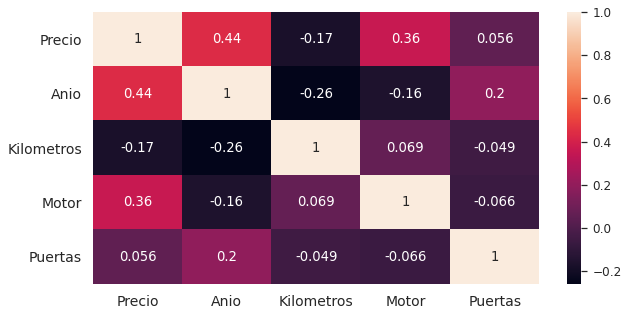

In [986]:
fig, axs = plt.subplots(figsize = (10,5))
axs.tick_params(axis = 'y', labelsize = 14, pad = 5)
axs.tick_params(axis = 'x', labelsize = 14, pad = 5)
sns.set(font_scale = 1.1)
sns.heatmap(df.corr(), annot = True)
plt.show()

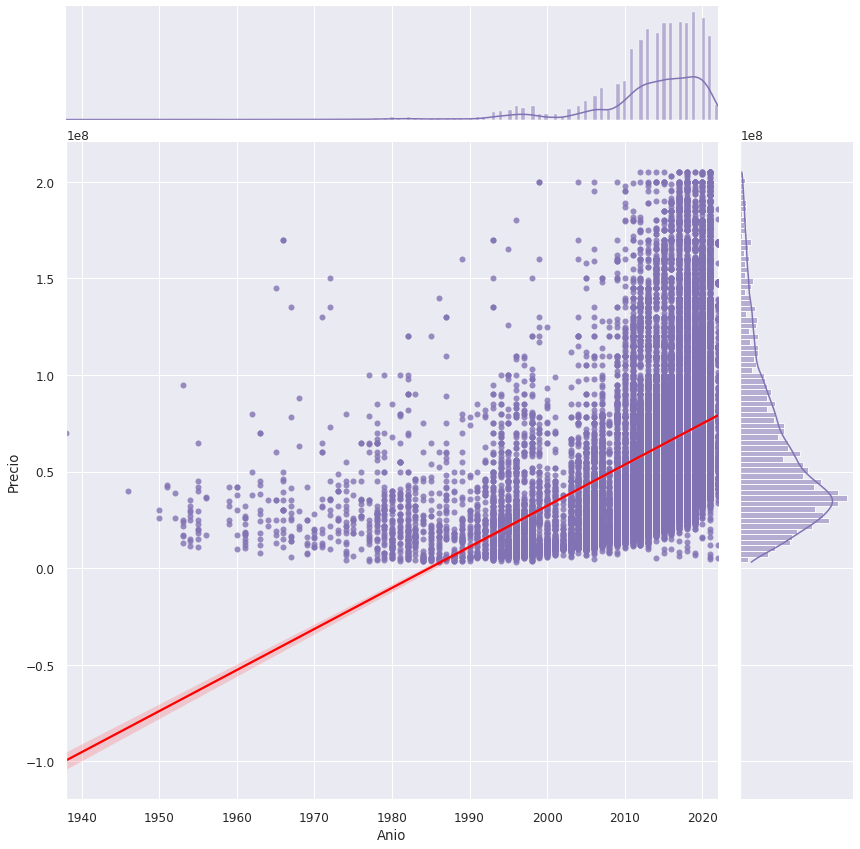

In [987]:
plot = sns.jointplot(data = df, x = 'Anio', y = 'Precio', height = 12, kind = 'reg', color='m', line_kws={'color': 'red'})
plt.show()

## Generating the CSV file

In [988]:
#df.to_csv('full_data.csv')